In [59]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Function to calculate outliers


def plotting(values : dict):
  df = pd.read_csv("/content/churn_prediction.csv")
  df.head(10)
  df['last_transaction'] = df['last_transaction'].str.replace('2019', '2023')

  # Recalculate days since last transaction
  df['last_transaction'] = pd.to_datetime(df['last_transaction'])
  df['days_since_last_transaction'] = (datetime.datetime.now() - df['last_transaction']).dt.days
  df.dropna(subset = "days_since_last_transaction", inplace = True)

  variable_labels = {
      'current_balance': 'Current Balance',
      'current_month_debit': 'Current Month Debit',
      'previous_month_debit': 'Previous Month Debit',
      'current_month_balance': 'Current Month Balance',
      'average_monthly_balance_prevQ': 'Average Monthly Balance (Prev Q)',
      'previous_month_balance': 'Previous Month Balance',
      'previous_month_end_balance': 'Previous Month End Balance',
      'average_monthly_balance_prevQ2': 'Average Monthly Balance (Prev Q2)',
      'days_since_last_transaction': 'Days Since Last Transaction',
      'previous_month_credit': 'Previous Month Credit'
  }

  # Mean values of feature variables
  variable_values = list(values.values())

  # New record (assumed to be the mean of all feature variables)
  new_record_values = np.array(variable_values)

  # Number of variables
  num_vars = len(graph_variables)

  # Compute angle for each axis
  angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

  # Make the plot close to a circle
  values_ = np.concatenate((new_record_values,[new_record_values[0]]))
  angles += angles[:1]

  # Plot
  fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
  ax.fill(angles, values_, color='blue', alpha=0.25)
  ax.plot(angles, values_, color='blue', linewidth=2)
  ax.set_yticklabels([])
  ax.set_xticks(angles[:-1])
  ax.set_xticklabels([variable_labels[var] for var in graph_variables], fontsize=10)
  ax.yaxis.grid(True)

  plt.show()

  def get_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (data < lower_bound) | (data > upper_bound)

  # Define the variable names
  variables = ['current_balance', 'current_month_debit', 'previous_month_debit', 'current_month_balance',
              'average_monthly_balance_prevQ', 'previous_month_balance', 'previous_month_end_balance',
              'average_monthly_balance_prevQ2', 'days_since_last_transaction', 'previous_month_credit']


  # Create the subplots
  fig = make_subplots(rows=2, cols=5, subplot_titles=variables)

  # Loop through each variable
  for i, var in enumerate(variables):
      # Filter the data for churn = 0 and churn = 1
      churn_0_data = df[df['churn'] == 0][var]
      churn_1_data = df[df['churn'] == 1][var]

      # Filter outliers
      churn_0_data_clean = churn_0_data[~get_outliers(churn_0_data)]
      churn_1_data_clean = churn_1_data[~get_outliers(churn_1_data)]

      # Create a box trace for churn = 0
      box_churn_0 = go.Box(y=churn_0_data_clean, name='Churn = 0', boxpoints=False)

      # Create a box trace for churn = 1
      box_churn_1 = go.Box(y=churn_1_data_clean, name='Churn = 1', boxpoints=False)

      # Get the value for the horizontal line
      value = values[var]

      # Create a horizontal line trace for the mean value
      line_mean = go.Scatter(x=['Churn = 0', 'Churn = 1'], y=[value, value], mode='lines', name='Mean')

      # Add the traces to the subplot
      fig.add_trace(box_churn_0, row=i // 5 + 1, col=i % 5 + 1)
      fig.add_trace(box_churn_1, row=i // 5 + 1, col=i % 5 + 1)
      fig.add_trace(line_mean, row=i // 5 + 1, col=i % 5 + 1)

  # Update layout
  fig.update_layout(title="Box Plots for Various Variables by Churn (with IQR and Mean)",
                    showlegend=False,
                    font=dict(size=10))

  # Show the plot
  fig.show()


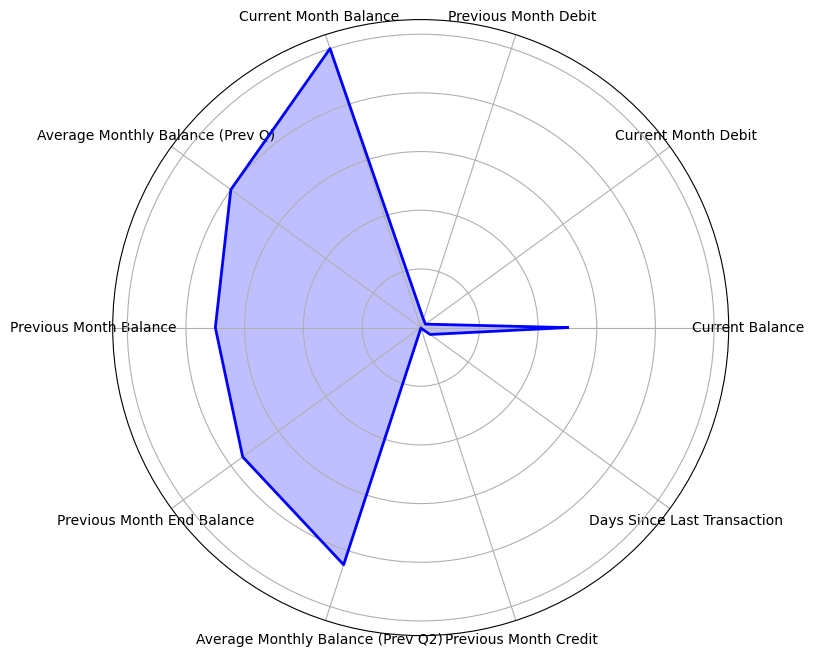

In [61]:
plotting(values)